In [54]:
import pandas as pd
import datamol as dm
from datamol import sanitize_mol, remove_salts_solvents

In [55]:
df = dm.read_csv('data/1000_rnd.smi', header=None, smiles_column=0).rename(columns={0: 'smi'})
df

,smi,mol
0,CC(CO)NC1=NSC=C1C1(C)OCC(C)O1,<rdkit.Chem.rdchem.Mol object at 0x000001D48D1...
1,CC1CC(O)C2=C(CC3CCC3)N=NN12,<rdkit.Chem.rdchem.Mol object at 0x000001D48D1...
2,CCN(C)C(C)(C)C1=NN(CC(C)C)N=C1,<rdkit.Chem.rdchem.Mol object at 0x000001D48D1...
3,CCCC(O)C1=CC=NC=C1C1N=COC1C,<rdkit.Chem.rdchem.Mol object at 0x000001D48D1...
4,CCC1CC1C1OC(CC)S(=O)(=O)C1C#N,<rdkit.Chem.rdchem.Mol object at 0x000001D48D1...
...,...,...
995,CC1=C(O)N=C(CN=C2SN=C(O)NC2=N)S1,<rdkit.Chem.rdchem.Mol object at 0x000001D48D2...
996,CC1C(CCCC11CCOC1(C)C)NC(C)=O,<rdkit.Chem.rdchem.Mol object at 0x000001D48D2...
997,CC1C(C)N2CCC(C)CC22CC(C)NCC12,<rdkit.Chem.rdchem.Mol object at 0x000001D48D2...
998,CCC1(C)NCCC1C1(C)CC2CCN=C2O1,<rdkit.Chem.rdchem.Mol object at 0x000001D48D2...


In [59]:
from rdkit.Chem import Descriptors
Descriptors.descList

[('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('SPS', <function rdkit.Chem.SpacialScore.SPS(mol, normalize=True)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('Ma

In [72]:
from molfeat.trans import FPVecTransformer

descs_list = ['MolWt', 'MolLogP', 'NumAromaticRings', 'NumHeteroatoms',   'NumRotatableBonds', 'FractionCSP3']

trans = FPVecTransformer('desc2D', descrs=descs_list, do_not_standardize=True)

with dm.without_rdkit_log():
    tmp = pd.DataFrame(trans(df.mol), index=df.index, columns=descs_list)

tmp

,MolWt,MolLogP,NumAromaticRings,NumHeteroatoms,NumRotatableBonds,FractionCSP3
0,258.342987,1.54380,1.0,6.0,4.0,0.727273
1,207.276993,1.61880,1.0,4.0,2.0,0.818182
2,224.352005,2.12090,1.0,4.0,5.0,0.833333
3,234.298996,2.40320,1.0,4.0,4.0,0.538462
4,243.328003,1.47438,0.0,5.0,3.0,0.909091
...,...,...,...,...,...,...
995,271.326996,0.22769,2.0,9.0,2.0,0.250000
996,239.358994,2.49640,0.0,3.0,1.0,0.928571
997,236.403000,2.49330,0.0,2.0,0.0,1.000000
998,236.358994,2.36200,0.0,3.0,2.0,0.928571


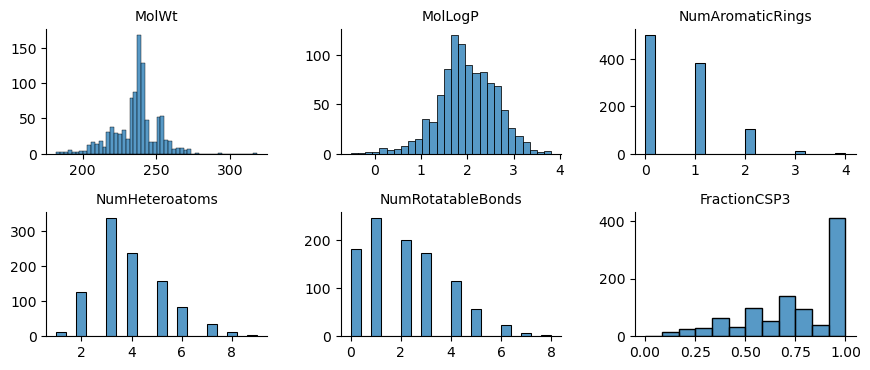

In [122]:
import seaborn as sns
melted = tmp.melt(var_name='col', value_name='value')

g = sns.FacetGrid(melted, col='col', col_wrap=3, height=2, aspect=1.5, sharey=False, sharex=False)
g.map(sns.histplot, 'value');
g.set_axis_labels('', '')
g.set_titles(template='{col_name}');